# Do mountaineers die younger?

![Hermann Buhl](buhl2.webp)


A question often asked and typically answered with an emphatic _YES_ is if mountaineers and climbers do indeed die younger than people with less exposure to severe weather conditions, high altitude, and overhanging rock. Here's a little attempt to answer this question, using the __Wikipedia API__ to get the data, some processing of the text data, and some basic data visualisation.

In [893]:
## Import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import wikipedia
import wikipediaapi
import re

%matplotlib inline  
pd.set_option('display.max_colwidth', 150)


In [894]:
## Get data from Wikipedia; if this fails, try a few more times
article_name = "List of climbers and mountaineers"

## initialize wiki page
wiki_wiki = wikipediaapi.Wikipedia('en')
mountaineers = wiki_wiki.page(article_name)

## get only the text data
mountaineers = mountaineers.text

In [895]:
## Check data
print("Type is: ", type(mountaineers))
print("Number of letters: ", len(mountaineers))

Type is:  <class 'str'>
Number of letters:  49645


In [896]:
## Split at new line and glimpse at the data
mountaineers = mountaineers.split("\n")
mountaineers = mountaineers[3:]
print("Number of entries: ", len(mountaineers))
mountaineers[:10]

Number of entries:  588


['Vitaly Abalakov (1906–1992) Russia, climbed Lenin Peak (1934) and Khan Tengri (1936)',
 'Yevgeniy Abalakov (1907–1948) Russia, climbed Communism Peak (1933)',
 'Premlata Agarwal (born 1963) India, first Indian woman to complete all Seven Summits',
 'H. P. S. Ahluwalia (fl. 1965) India, climbed Mount Everest in 1965',
 'Pierre Allain (1904–2000) France, championed bouldering at Fontainebleau, and inventor of rubber rock-climbing shoes',
 'Christian Almer (1826–1898) Switzerland, numerous first ascents, including Eiger',
 'Ashraf Aman (born 1943) Pakistan, first Pakistani ascent of K2',
 'Luigi Amedeo, Duke of Abruzzi (1873–1933) Italy, first ascent of Mount Saint Elias of the Rwenzori Mountains',
 'Pat Ament (born 1946) US, rock climber and pioneer boulderer',
 'Melchior Anderegg (1827–1912) Switzerland, guide, with numerous first ascents, including new routes on Mont Blanc']

We can see that we now have a list of strings, one for each mountaineer, typically starting with their name, birth (and death) year, country, and some additional informationon their accomplishments in the mountains. In the following, we will grab the relevant info so we can plot what we're interested in.

In [897]:
## Turn into pandas df
df = pd.DataFrame(mountaineers)
df.head(10)

,0
0,"Vitaly Abalakov (1906–1992) Russia, climbed Lenin Peak (1934) and Khan Tengri (1936)"
1,"Yevgeniy Abalakov (1907–1948) Russia, climbed Communism Peak (1933)"
2,"Premlata Agarwal (born 1963) India, first Indian woman to complete all Seven Summits"
3,"H. P. S. Ahluwalia (fl. 1965) India, climbed Mount Everest in 1965"
4,"Pierre Allain (1904–2000) France, championed bouldering at Fontainebleau, and inventor of rubber rock-climbing shoes"
5,"Christian Almer (1826–1898) Switzerland, numerous first ascents, including Eiger"
6,"Ashraf Aman (born 1943) Pakistan, first Pakistani ascent of K2"
7,"Luigi Amedeo, Duke of Abruzzi (1873–1933) Italy, first ascent of Mount Saint Elias of the Rwenzori Mountains"
8,"Pat Ament (born 1946) US, rock climber and pioneer boulderer"
9,"Melchior Anderegg (1827–1912) Switzerland, guide, with numerous first ascents, including new routes on Mont Blanc"


In [898]:
df.tail(10)

,0
578,"Wawrzyniec Żuławski (1916–1957) Polish composer, music critic and teacher; died during Mont Blanc rescue mission; son of Jerzy Żuławski"
579,"Matthias Zurbriggen (1856–1917) Switzerland, first ascent Aconcagua (1897)"
580,
581,See also
582,List of 20th-century summiters of Mount Everest
583,
584,References
585,External links
586,
587,Mountaineering Who's Who


In [899]:
## Drop last rows that contain Wikipedia links
df.drop(df.tail(8).index,inplace=True) # drop last n rows
df.tail()


,0
575,"Jerzy Żuławski (1874–1915) Polish literary figure, philosopher, translator and alpinist"
576,"Juliusz Żuławski (1910–1999) Polish poet, prose writer, literary critic, translator and climber; son of Jerzy Żuławski"
577,"Marek Żuławski (1908–1985) Polish painter, graphic artist, author and climber; son of Jerzy Żuławski"
578,"Wawrzyniec Żuławski (1916–1957) Polish composer, music critic and teacher; died during Mont Blanc rescue mission; son of Jerzy Żuławski"
579,"Matthias Zurbriggen (1856–1917) Switzerland, first ascent Aconcagua (1897)"


In [900]:
## Grab the name, which is always followed by a bracket
df = df[0].str.split("(", n=1, expand=True)
df = df.rename(columns={0: "Name"})
df.sample(10)

,Name,1
55,Jack Borgenicht,"1911-2005), USA, garment manufacturer, philanthropist, oldest person to climb Mount Rainier at age 81"
96,Norman Clyde,"1886–1972) US, pioneer of California's Sierra Nevada"
57,Christine Boskoff,"1967–2006) US, 6 8,000m summits, including Everest twice, died on Genyen Peak"
547,Jim Whittaker,"born 1929) US, first US ascent Everest (1963)"
500,Mieczysław Szczuka,None
312,Erhard Loretan,"1959–2011) Switzerland, 14 8,000m-plus summits (1982–1995)"
393,James Outram,"1864–1925) Canada, first ascent of Mount Assiniboine"
8,Pat Ament,"born 1946) US, rock climber and pioneer boulderer"
413,"Carla Perez Ecuadorian climber, first Latin American female to ascend mount Everest with no supplemental oxygen",None
383,O,None


In [901]:
## Check where name is longer than 6 words
df[df["Name"].str.split(" ").str.len() > 6]

,Name,1
17,"Abdul Jabbar Bhatti, Pakistani mountaineer and the former military officer of the Pakistan Army",None
20,"Samina Baig - Gilgit-Baltistan, 3rd Pakistani and only Pakistani woman to climb Mount Everest",None
28,Andrzej Bargiel Current record holder in speed to get Snow Leopard award and current record holder Elbrus Race,None
41,"Didier Berthod Switzerland, featured in First Ascent",None
166,"Tom Frost US, rock climber, first ascents of big walls in Yosemite Valley",None
174,"Lene Gammelgaard Denmark, author of Climbing High, first female Scandinavian ascent of Everest",None
201,"Dave Hahn - US, 11 Everest ascents, 26 Vinson Massif ascents, 19 Denali ascents",None
255,Narendra Dhar Jayal a.k.a. 'Nandu' Jayal,"died 1958) India, first Director of Himalayan Institute of Mountaineering"
353,"Tyrhee Moore US, member of the first all African-American team to climb Denali",None
373,"Fred Nicole Switzerland, numerous first ascents of sport routes and boulders",None


We see that there's a bunch of useless entries, as they don't contain relevant information. Let's ditch them.

In [902]:
## Drop rows with long names
df = df[df["Name"].str.split(" ").str.len() < 7]
## Drop rows with short names (like list characters, A, B, C, D,...)
df = df[df["Name"].str.split("").str.len() > 3]
print("Number of rows: ", df.shape[0])
df.sample(10)

Number of rows:  515


,Name,1
37,Gertrude Bell,"1868–1926) UK, many ascents in Alps and further afield"
140,James Eccles,"1838–1915) UK, first ascents in Mont Blanc massif"
579,Matthias Zurbriggen,"1856–1917) Switzerland, first ascent Aconcagua (1897)"
391,Stanisław Osiecki,None
52,Walter Bonatti,"1930–2011) Italy, mountaineer and writer, solo new routes on Aiguille du Dru and Matterhorn"
11,Tyler Armstrong,"born 2004) US, in 2013, at age 9, the youngest to climb Aconcagua"
30,Charles Barrington,"1834–1901) UK, first ascent Eiger (1858)"
205,Peter Harding,"1924–2007) UK, prominent climber of the 1940s"
291,Julius Kugy,"1858–1944) Austria-Slovenia, considered the father of modern mountaineering in the Julian Alps"
23,Jacques Balmat,"1762–1834) Duchy of Savoy, Chamonix-based guide, first ascent Mont Blanc (1786)"


In [903]:
## Grab the birth (and, where applicable, death) year
df[["Year","Rest"]] = df[1].str.split(")",n=1,expand=True)
df = df.drop(1,axis=1)
df.sample(10)


,Name,Year,Rest
242,Marcel Ichac,1906–1994,"France, filmed first French expedition in Himalaya Karakoram (1936) and 1950 French Annapurna expedition"
5,Christian Almer,1826–1898,"Switzerland, numerous first ascents, including Eiger"
256,Ganesh Jena,born 1972,"India, first male from Odisha, India to climb Mount Everest"
379,Wilfrid Noyce,1917–1962,"UK, on Everest expedition (1953), reaching South Col, killed in Pamirs (1962)"
233,Steve House,born 1970,"US, solo ascent K7 (2004), first ascent Nanga Parbat Rupal face (2005)"
64,David Breashears,born 1956,"US, Everest twice, directed IMAX film Everest"
171,Patrick Gabarrou,born 1951,"France, first ascents in Mont Blanc massif"
393,James Outram,1864–1925,"Canada, first ascent of Mount Assiniboine"
465,Mostafa Salameh,born 1970,"Jordan, first Jordanian to summit Everest, and Seven Summits"
186,Dan Goodwin,born 1955,"US, rock/building climber, climbed World Trade Center, Sears Tower, John Hancock Center and CN Tower"


In [904]:
## Split birth and death year
df[["Born","Died"]] = df["Year"].str.split("–",n=1,expand=True)
df = df.drop("Year",axis=1)
df.sample(10)

,Name,Rest,Born,Died
6,Ashraf Aman,"Pakistan, first Pakistani ascent of K2",born 1943,None
63,Samuel Brawand,"Switzerland, politician and mountain guide; first ascent of Mittellegigrat (northeast ridge of Eiger) (1921)",1898,2001
306,Raymond Lambert,"Switzerland, reached 8611m, highest altitude at that time, with 1952 Swiss Everest expedition",1914,1997
516,Julie Tullis,"UK, Broad Peak (1984) and K2 (1986); died on descent from K2",1939,1986
483,Todd Skinner,"US, rock climber, first free ascent Salathe Wall, died on Leaning Tower",1958,2006
420,Klára Poláčková,first Czech female ascent Everest,born 1978,None
160,Scott Fischer,"US, Lhotse 1990, K2 1992, Everest 1994; died in 1996 Mount Everest disaster",1955,1996
547,Jim Whittaker,"US, first US ascent Everest (1963)",born 1929,None
331,Sergio Martini,"Italy, seventh ascent of all eight-thousanders (1983–2000)",born 1949,None
156,Sue Fear,"Australia, five 8,000ers, killed in crevasse fall on Manaslu",1963,2006


In [905]:
## Grab country
Country = df["Rest"].str.split(n=1,expand=True)
Country = Country[0].str.strip(",")
df["Country"] = Country
df = df.drop("Rest",axis=1)
df.sample(10)

,Name,Born,Died,Country
191,Paul Grohmann,1838,1908,Austria
97,Johann Coaz,1822,1918,Switzerland
559,Daniel Woods,born 1989,None,American
575,Jerzy Żuławski,1874,1915,Polish
244,Ulrich Inderbinen,1900,2004,Switzerland
364,Don Munday,1890,1950,Canada
473,John Sherman,born 1959,None,US
11,Tyler Armstrong,born 2004,None,US
485,Laurie Skreslet,born 1949,None,Canada
233,Steve House,born 1970,None,US


In [906]:
## extract digits from birth and death year
df['Born'] = df['Born'].str.extract('(\d+)')
df['Died'] = df['Died'].str.extract('(\d+)')
df.sample(10)


,Name,Born,Died,Country
141,Oscar Eckenstein,1859,1921,UK
196,Veikka Gustafsson,1968,NaN,Finland
156,Sue Fear,1963,2006,Australia
546,Rick White,1946,2004,Australia
7,"Luigi Amedeo, Duke of Abruzzi",1873,1933,Italy
98,J. Norman Collie,1859,1942,UK
72,Hermann Buhl,1924,1957,Austria
483,Todd Skinner,1958,2006,US
518,John Tyndall,1820,1893,UK
393,James Outram,1864,1925,Canada


In [907]:
## Turn year into datetime
df["Born"] = pd.to_datetime(df["Born"], errors = 'coerce').dt.year
df["Died"] = pd.to_datetime(df["Died"], errors = 'coerce').dt.year
df.sample(10)

,Name,Born,Died,Country
202,Artur Hajzer,1962.0,2013.0,Poland
423,Paul Pritchard,1967.0,NaN,UK
465,Mostafa Salameh,1970.0,NaN,Jordan
226,Andreas Hinterstoisser,1914.0,1936.0,Germany
324,Nasuh Mahruki,1968.0,NaN,Turkey
363,Albert F. Mummery,1855.0,1895.0,UK
105,W. A. B. Coolidge,1850.0,1926.0,US
288,Hans Kraus,1905.0,1995.0,Austria
228,Marty Hoey,1951.0,1982.0,US
434,Brooke Raboutou,2001.0,NaN,US


In [908]:
## Drop those without a birth year
df = df[df["Born"].notna()]
df["Age"] = df["Died"] - df["Born"]
print("Number of rows: ", df.shape[0])
df.sample(10)

Number of rows:  485


,Name,Born,Died,Country,Age
149,Nick Estcourt,1942.0,1978.0,UK,36.0
401,Young-seok Park,1963.0,2011.0,South,48.0
68,David Brower,1912.0,2000.0,US,88.0
127,Catherine Destivelle,1960.0,NaN,France,NaN
55,Jack Borgenicht,1911.0,NaN,,NaN
54,Thomas George Bonney,1833.0,1923.0,UK,90.0
46,Smoke Blanchard,1915.0,1989.0,US,74.0
66,Russell Brice,1952.0,NaN,New,NaN
364,Don Munday,1890.0,1950.0,Canada,60.0
256,Ganesh Jena,1972.0,NaN,India,NaN


In [909]:
## create column for vitality and age
df["Alive"] = np.where(df['Age'].notna(), "Dead", "Alive")
df.loc[df["Died"].isna(), "Age"] = 2022 - df["Born"]
## Clean too old one's (aka death year missing)
df = df[df["Age"] < 105]
df.head()

,Name,Born,Died,Country,Age,Alive
0,Vitaly Abalakov,1906.0,1992.0,Russia,86.0,Dead
1,Yevgeniy Abalakov,1907.0,1948.0,Russia,41.0,Dead
2,Premlata Agarwal,1963.0,NaN,India,59.0,Alive
3,H. P. S. Ahluwalia,1965.0,NaN,India,57.0,Alive
4,Pierre Allain,1904.0,2000.0,France,96.0,Dead


In [910]:
replacement_dict = {"Austrian": "Austria", 
                    "Polish": "Poland", 
                    "Duchy": "France", 
                    "": "Unknown", 
                    "FPR": "Croatia", 
                    "Scottish": "UK",
                    "Scotland": "UK", 
                    "New": "New Zealand",
                    "Britain": "UK",
                    "British": "UK",
                    "Germany/Switzerland": "Germany",
                    "Ireland?": "Ireland",
                    "Argentina/US": "Argentinia",
                    "Iranian": "Iran",
                    "Australia/UK": "Australia",
                    "Pakistani": "Pakistan",
                    "Austria/Canada": "Austria",
                    "Austria-Slovenia": "Slovenia",
                    "Czechoslovakia": "Czech Republic",
                    "Scottish-born": "UK",
                    "United": "US",
                    "Sherpa": "Nepal",
                    "Czech": "Czech Republic",
                    "Gilgit-Baltistan": "Pakistan",
                    "American": "US",
                    "Swiss": "Switzerland",
                    "Switzerland/US": "Switzerland",
                    "England/Australia": "Australia",
                    "Czech-Austrian": "Czech Republic",
                    "Canadian": "Canada",
                    "France/Ireland": "France",
                    "German": "Germany",
                    "in": "UK",
                    "a": "Poland",
                    "leader": "UK",
                    "First": "UK",
                    "pioneering": "US",
                    "Basque": "Spain",
                    "US": "United States",
                    "UK": "United Kingdom"
                    }


df = df.replace({'Country': replacement_dict})


In [911]:
## replace country "first" and "South" with country looked up on wikipedia
df.loc[df["Name"] == "Maciej Berbeka ", "Country"] = "Poland"
df.loc[df["Name"] == "Adam Bielecki ", "Country"] = "Poland"
df.loc[df["Name"] == "Klára Poláčková ", "Country"] = "Czech Republic"
df.loc[df["Name"] == "Ludwig Purtscheller ", "Country"] = "Austria"
df.loc[df["Name"] == "Pasang Lhamu Sherpa ", "Country"] = "Nepal"
df.loc[df["Name"] == "Bachendri Pal ", "Country"] = "India"
df.loc[df["Name"] == "Warren J. Harding ", "Country"] = "United States"
df.loc[df["Name"] == "Cathy O'Dowd ", "Country"] = "South Africa"
df.loc[df["Name"] == "Oh Eun-Sun ", "Country"] = "South Korea"
df.loc[df["Name"] == "Young-seok Park ", "Country"] = "South Korea"
df.loc[df["Name"] == "Um Hong-Gil ", "Country"] = "South Korea"
df.loc[df["Name"] == "Sibusiso Vilane ", "Country"] = "South Africa"


In [912]:
df = df[df["Country"].notna()]
print("Total number of climbers:", df.shape[0])
df.sample(10)

Total number of climbers: 482


,Name,Born,Died,Country,Age,Alive
6,Ashraf Aman,1943.0,NaN,Pakistan,79.0,Alive
357,Simone Moro,1967.0,NaN,Italy,55.0,Alive
260,Raghav Joneja,1997.0,NaN,India,25.0,Alive
50,Emmanuel Boileau de Castelnau,1857.0,1923.0,France,66.0,Dead
111,Peter Croft,1958.0,NaN,Canada,64.0,Alive
355,Piotr Morawski,1976.0,2009.0,Poland,33.0,Dead
29,Lilliane and Maurice Barrard,1948.0,1986.0,France,38.0,Dead
122,Steph Davis,1973.0,NaN,United States,49.0,Alive
21,John Bachar,1957.0,2009.0,United States,52.0,Dead
53,Sir Chris Bonington,1934.0,NaN,United Kingdom,88.0,Alive


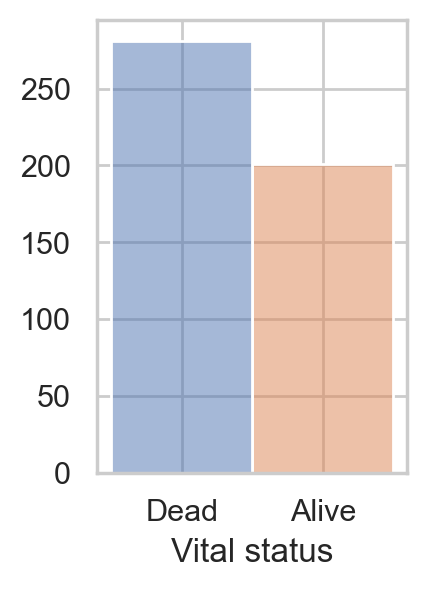

In [913]:
## Plot dead and alive
plt.figure(figsize=(2,3),dpi=200)
ax = sns.histplot(data=df,x="Alive", hue="Alive", legend=False)
ax.set(xlabel="Vital status", ylabel="")
plt.show()


In the above plot we can see that more mountaineers in this list are dead than alive. This doesn't tell us much, the past is bigger than the present. Let's dig in a bit.

## Number of dead/alive mountaineers by country

In [914]:
## make df for plotting
plot_data = pd.DataFrame(df[["Country"]].groupby(["Country"]).value_counts()).reset_index()
plot_data.columns = ["Country", "Count"]
plot_data = plot_data.sort_values("Count", ascending=False).head(25)

dead_ones = df[["Country", "Alive"]].groupby(["Country", "Alive"]).value_counts().reset_index().sort_values(0, ascending=False)
dead_ones.columns = ["Country", "Alive", "Dead"]
plot_data = pd.merge(plot_data, dead_ones[["Dead", "Country"]][dead_ones["Alive"]=="Dead"].head(25), on="Country", how="left").fillna(0)

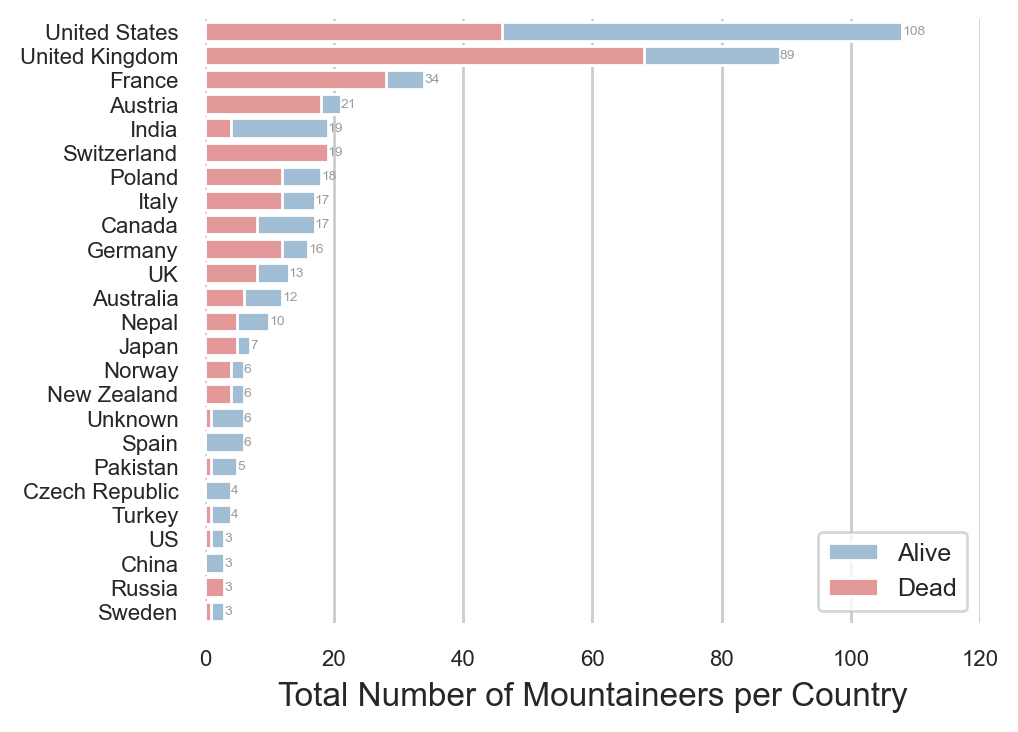

In [915]:
## Plot per country
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(5,4),dpi=200)

sns.set_color_codes("pastel")
sns.barplot(x="Count", 
            y="Country", 
            data=plot_data,
            label="Alive", 
            color = "#99BEDB", 
            order=plot_data.sort_values('Count', ascending=False).Country)

sns.set_color_codes("muted")
sns.barplot(x="Dead", 
            y="Country", 
            data=plot_data,
            label="Dead", 
            color = "#F18C8C", 
            order=plot_data.sort_values('Count', ascending=False).Country)

ax.legend(ncol=1, loc="lower right", frameon=True, fontsize=9)
ax.set(xlim=(0, 120), ylabel="",
       xlabel="Total Number of Mountaineers per Country")
ax.bar_label(ax.containers[0], size=5, label_type="edge", padding=0, color="#999DA0")

ax.tick_params(labelsize=8)

sns.despine(left=True, bottom=True)

The __vast__ majority of climbers and mountaineers in this list are from either the US or the UK. The UK has historically been a [pioneering mountaineering country](https://en.wikipedia.org/wiki/Golden_age_of_alpinism), whereas the US brought produced many legendary climbers _and_ mountaineers in the 20th century.

## Age distribution by vital status

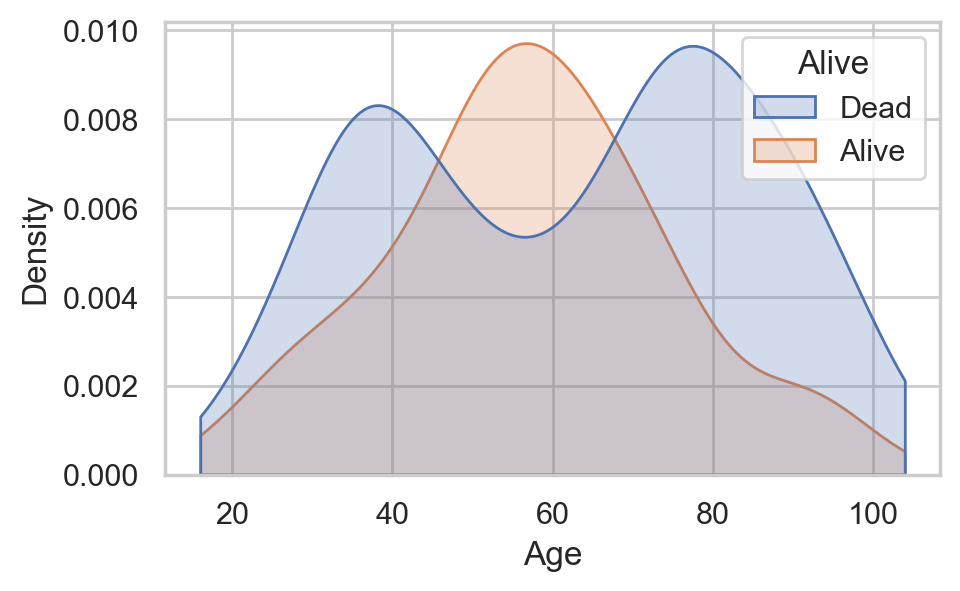

In [927]:
plt.figure(figsize=(5,3),dpi=200)
sns.kdeplot(data=df,x="Age",hue="Alive",fill=True, clip=[df["Age"].min(),df["Age"].max()]);

In the plot above we see a first pattern: Those legendary mountaineers still alive show an almost bell-shaped age distribution, with a mean around 55 years. Of course it takes some striking accomplishments to end up in this list, which is the reason for the thinning left end. More interesting, however, is the bimodal distribution of the dead ones: We see one peak at around 38 years and another on around 78 years. Let's have a closer look at those that no longer climb mountains.

Life expectancy changed quite drastrically in the last centuries; let's have a look at how this manifested in mountaineers.

## Age at death by century born

In [929]:
df["Century"] = np.where(df['Born'] < 1900, "before 1900", "after 1900")
df.sample(10)

,Name,Born,Died,Country,Age,Alive,Century
154,Freda du Faur,1882.0,1935.0,Australia,53.0,Dead,before 1900
56,Alastair Borthwick,1913.0,2003.0,UK,90.0,Dead,after 1900
223,Sandy Hill,1955.0,NaN,United States,67.0,Alive,after 1900
357,Simone Moro,1967.0,NaN,Italy,55.0,Alive,after 1900
187,Dave Graham,1981.0,NaN,United States,41.0,Alive,after 1900
147,Leila Esfandyari,1970.0,2011.0,Iran,41.0,Dead,after 1900
65,Meta Brevoort,1825.0,1876.0,United States,51.0,Dead,before 1900
398,Tsewang Paljor,1968.0,1996.0,India,28.0,Dead,after 1900
259,Alex Johnson,1989.0,NaN,United States,33.0,Alive,after 1900
151,John Ewbank,1948.0,2013.0,Australia,65.0,Dead,after 1900


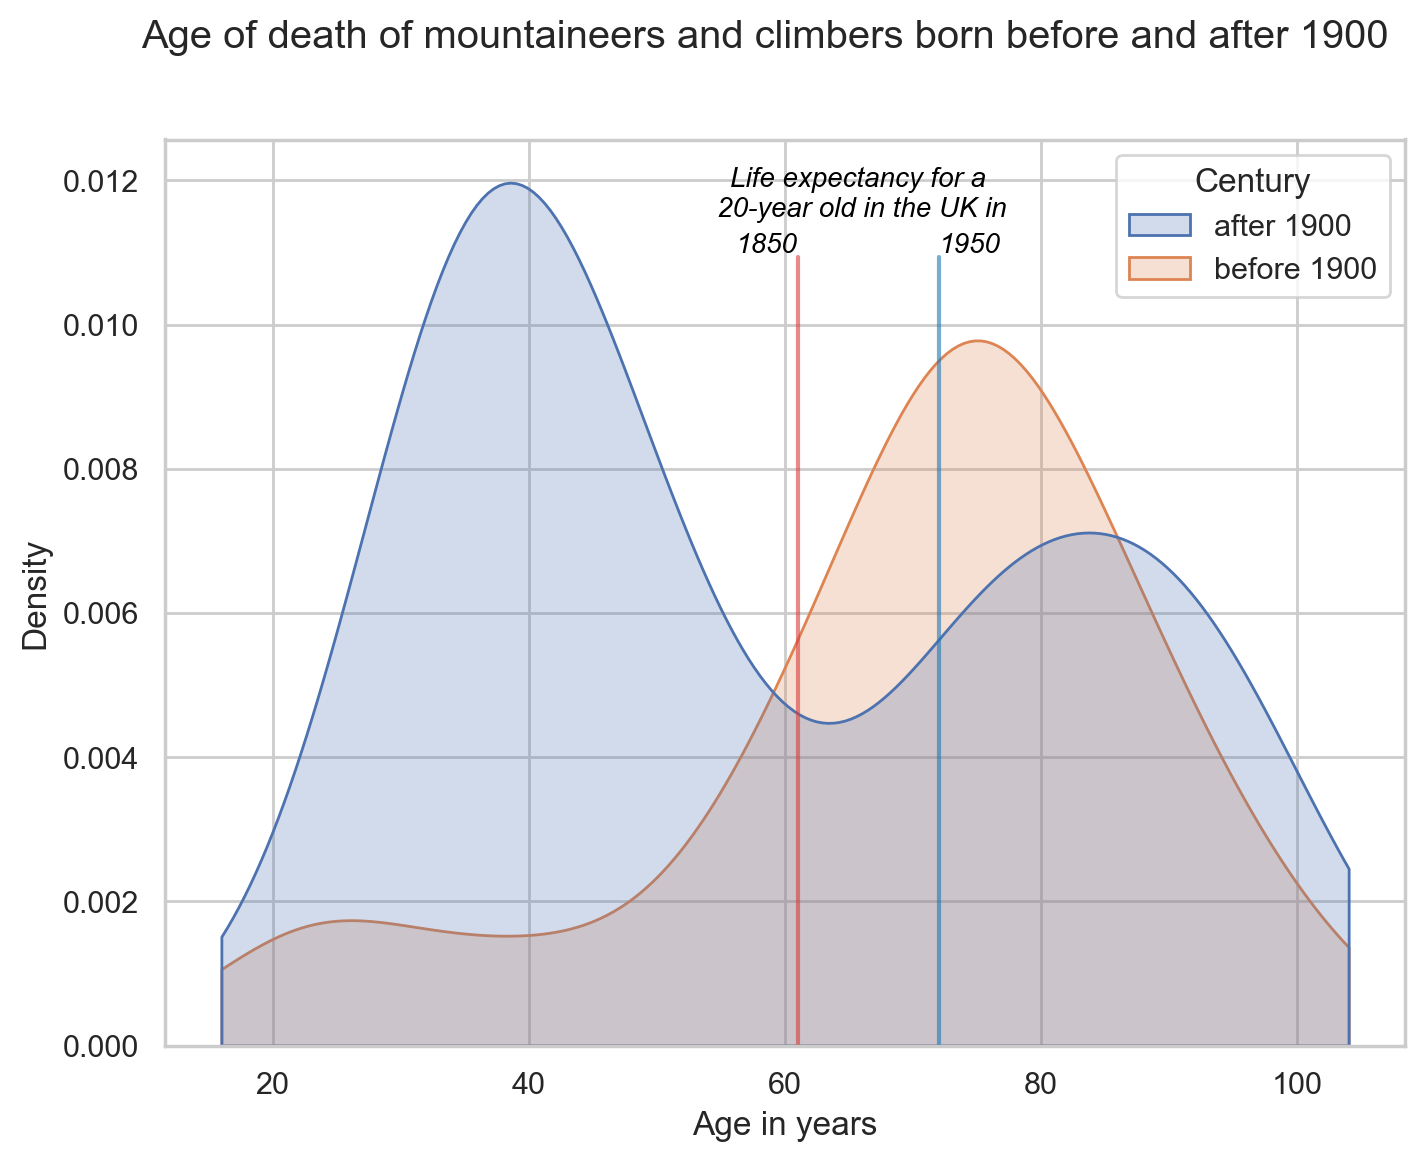

In [931]:
plt.figure(figsize=(8,6),dpi=200)

sns.kdeplot(data=df[df["Alive"] == "Dead"],x="Age",hue="Century",fill=True,clip=[df["Age"].min(),df["Age"].max()])
plt.xlabel('Age in years')
plt.suptitle("Age of death of mountaineers and climbers born before and after 1900")

plt.axvline(61, 0, 0.87,color="#DA3C3A",alpha=.6) # life expectancy for a 20 year old in the UK 1850 https://ourworldindata.org/life-expectancy
plt.axvline(72, 0, 0.87,color="#1F77B4",alpha=.6) # life expectancy for a 20 year old in the UK 1950

plt.text(66, 0.0115, "Life expectancy for a \n20-year old in the UK in", horizontalalignment='center', size='small', color='black',style="italic")
plt.text(61, 0.011, "1850", horizontalalignment='right', size='small', color='black',style="italic")
plt.text(72, 0.011, "1950", horizontalalignment='left', size='small', color='black',style="italic")

plt.savefig("lifeexp.jpg")


__Spännande!__ Those mountaineers born before 1900 show a peak far above the [mean life expectancy of a 20-year old in the UK in 1850](https://ourworldindata.org/life-expectancy), clearly indicating that not many died of an unnatural death somewhere in the mountains. The reason being probably that neither high altitude mountaineering nor modern climbing existed, the dangers of a fatal accident were thus considerably lower. Those early pioneers discovered rather what we'd call hiking nowadays. 

__What about their increased life expectancy?__ Well, physical exercise in fresh air clearly contributes to a healthy and long life. A greater contributer however, might be their socio-economic status: Almost all mountaineers back then had a wealthy and aristocratic background and were spared a life of physical labour.

__For the modern climbers__ born 1900 or later, we see another bimodal distribution: The right hand peak arguably represents those that died of a natural death, again, well above the mean life expectancy on a population level in 1950. This time, however, it might rather be physical exercise and a healthy lifestyle supporting a longer life, since many of the famous climbers after 1900 were in fact working class or farmers (possibly adding to their recklessness).

__The peak to the left at around 38 years__ likely support the general stereotype of the daredevil in the mountain, riksing their life for purposeless yest meaningful joy. Let's do a quick and dirty check if this assumption about the type of cause of death holds.

In [938]:
## Subset data
dead_late = df[(df["Alive"] == "Dead") & (df["Century"]== "after 1900")]
dead_late["Death"] = np.where(dead_late["Age"] < 60, "premature", "natural");
dead_late.sample(10)

/var/folders/xb/pt024ps902n3_j_408fhg66h0000gn/T/ipykernel_27164/2388800693.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Born,Died,Country,Age,Alive,Century,Death
208,John Harlin,1934.0,1966.0,United States,32.0,Dead,after 1900,premature
565,Michael J. Ybarra,1966.0,2012.0,United States,46.0,Dead,after 1900,premature
132,Hans Christian Doseth,1958.0,1984.0,Norway,26.0,Dead,after 1900,premature
60,Tom Bourdillon,1924.0,1956.0,United Kingdom,32.0,Dead,after 1900,premature
228,Marty Hoey,1951.0,1982.0,United States,31.0,Dead,after 1900,premature
202,Artur Hajzer,1962.0,2013.0,Poland,51.0,Dead,after 1900,premature
95,Ian Clough,1939.0,1970.0,United Kingdom,31.0,Dead,after 1900,premature
151,John Ewbank,1948.0,2013.0,Australia,65.0,Dead,after 1900,natural
439,Gaston Rébuffat,1921.0,1985.0,France,64.0,Dead,after 1900,natural
242,Marcel Ichac,1906.0,1994.0,France,88.0,Dead,after 1900,natural


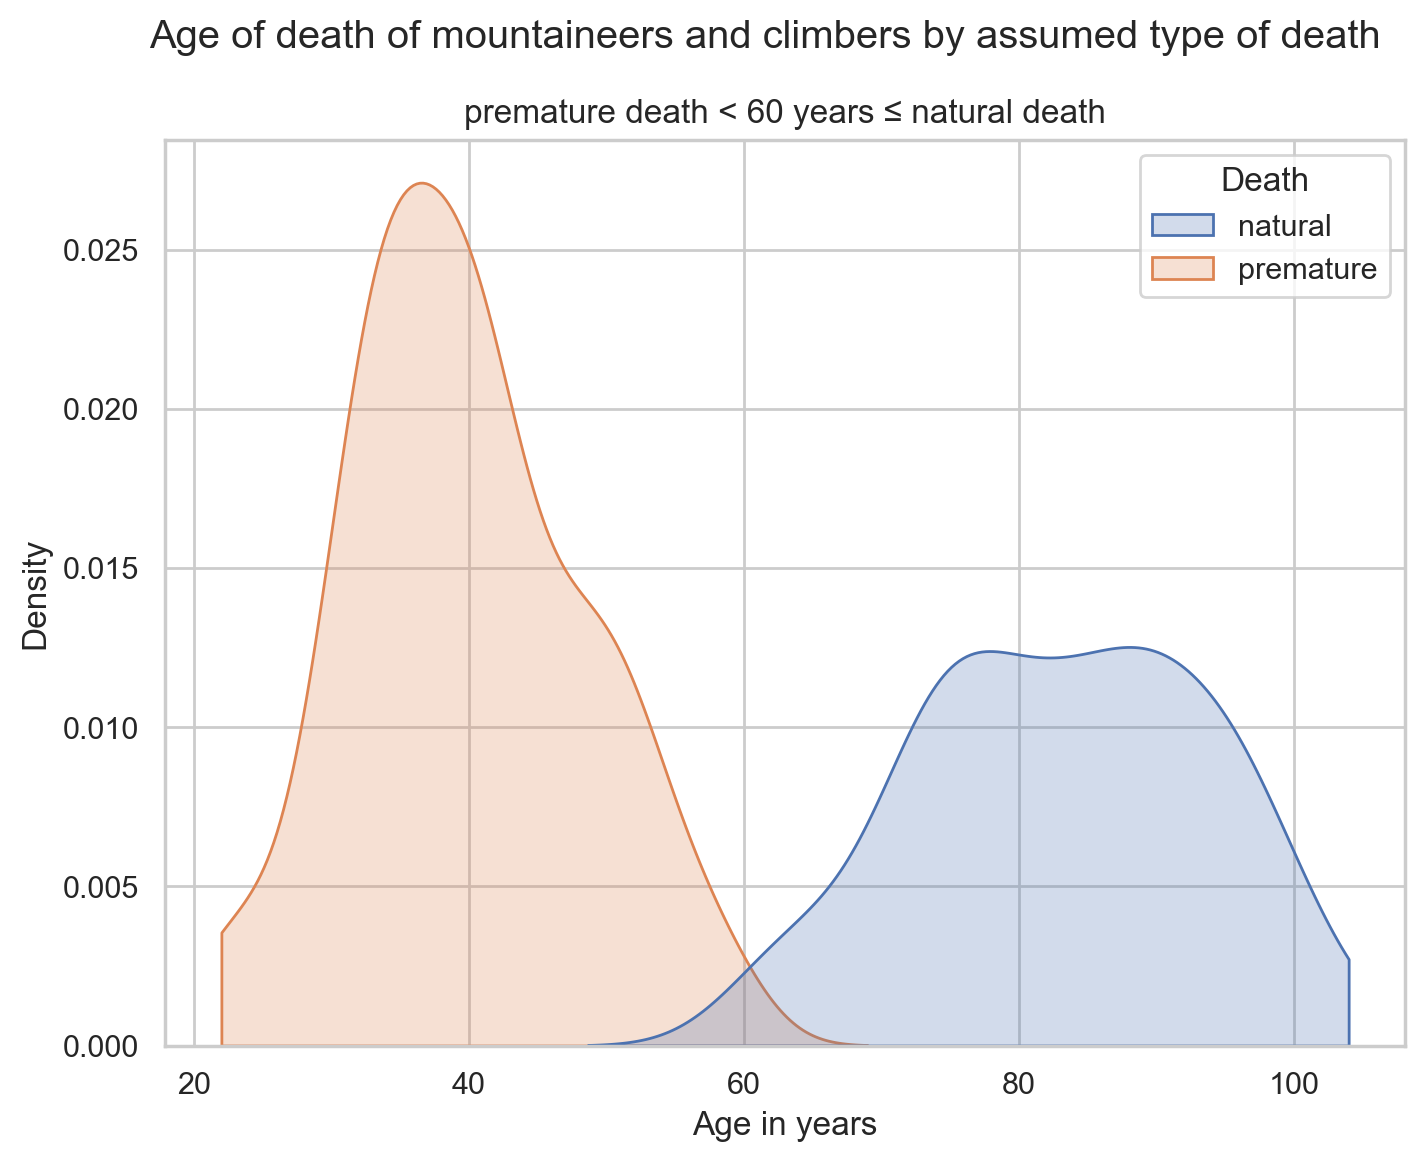

In [936]:
plt.figure(figsize=(8,6),dpi=200)

sns.kdeplot(data=dead_late,x="Age",hue="Death",fill=True,clip=[dead_late["Age"].min(),dead_late["Age"].max()])
plt.xlabel('Age in years')
plt.suptitle("Age of death of mountaineers and climbers by assumed type of death")
plt.title("premature death < 60 years ≤ natural death")
plt.show()

Above we can see the distribution of those we assumed dead because of an accident, and those who arguably died a natual death. The cutoff point at 60 years seems a good seperator of the two curves, but other than that arbitrary. Let's take a random sample of those that died a premature death (>60 years) and look up their causes of death.

In [269]:
dead_late[dead_late["Death"] == "premature"].sample(10, random_state=42)

,Name,Born,Died,Country,Age,Alive,Century,Death
488,Frank Smythe,1900,1949.0,United Kingdom,49.0,Dead,after 1900,premature
298,Toni Kurz,1913,1936.0,Germany,23.0,Dead,after 1900,premature
398,Tsewang Paljor,1968,1996.0,India,28.0,Dead,after 1900,premature
243,Dimitar Ilievski,1953,1989.0,Macedonia,36.0,Dead,after 1900,premature
237,Tomaž Humar,1969,2009.0,Slovenia,40.0,Dead,after 1900,premature
212,Dougal Haston,1940,1977.0,UK,37.0,Dead,after 1900,premature
132,Hans Christian Doseth,1958,1984.0,Norway,26.0,Dead,after 1900,premature
475,Pasang Lhamu Sherpa,1961,1993.0,Nepal,32.0,Dead,after 1900,premature
72,Hermann Buhl,1924,1957.0,Austria,33.0,Dead,after 1900,premature
1,Yevgeniy Abalakov,1907,1948.0,Russia,41.0,Dead,after 1900,premature


"[__Frank Smythe__] was taken ill with food poisoning; then a succession of malaria attacks took their toll"

"[__Toni Kurz__] died in 1936 during an attempt to climb the then-unclimbed north face of the Eiger with his partner Andreas Hinterstoisser."

"__Tsewang Paljor__, an Indian climber who died on Everest in 1996."

"[__Dimitar Ilievski__] died on the descent of Mt. Everest."

"[__Tomaž Humar__] was stuck on the mountain at an elevation of approximately 6,300 meters (20,700 ft) for several days before his body was found on November 14, 2009, at an elevation of 5,600 meters"

"[__Dougal Haston__] was killed in an avalanche in January 1977"

"__Hans Christian Doseth__ died (...) during an expedition (...) on Great Trango Tower (6286 m) in Karakoram, Pakistan"

"__Pasang Lhamu Sherpa__, w]hile descending from the summit, the weather, as often happens in the mountains, suddenly turned bad, causing her to lose her own life on the south summit."

"[__Hermann Buhl__] lost his way in an unexpected snow storm and walked over a huge cornice on the south-east ridge, near the summit of Chogolisa II"

"In the spring of 1948 __Abalakov__ died in Moscow, in obscure circumstances, while preparing for the ascent to the Victory Peak. "   <br>


(Source: [Wikipedia](https://en.wikipedia.org))

## Do mountaineers die younger?

![Hermann Buhl](buhl.jpeg)

Well, __9 out of 10__ died literally on the mountain, one of them on an expedition to a mountain, clearly corroborating the general view that extreme mountaineering and climbing is dangerous and often deadly at young age. Whether this is selfish or not, [others may judge.](https://www.nytimes.com/2019/04/27/opinion/mountain-climbing.html)